<a href="https://colab.research.google.com/github/Totttskyyy/tugasDMKelompok/blob/main/hepatitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import pydotplus
from IPython.display import Image
from sklearn import tree

In [15]:
data = pd.read_csv('hepatitis_csv.csv')
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [16]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['age']=enc.fit_transform(data['age'].values)
data['sex']=enc.fit_transform(data['sex'].values)
data['steroid']=enc.fit_transform(data['steroid'].values)
data['antivirals']=enc.fit_transform(data['antivirals'].values)
data['fatigue']=enc.fit_transform(data['fatigue'].values)
data['malaise']=enc.fit_transform(data['malaise'].values)
data['anorexia']=enc.fit_transform(data['anorexia'].values)
data['liver_big']=enc.fit_transform(data['liver_big'].values)
data['liver_firm']=enc.fit_transform(data['liver_firm'].values)
data['spleen_palpable']=enc.fit_transform(data['spleen_palpable'].values)
data['spiders']=enc.fit_transform(data['spiders'].values)
data['ascites']=enc.fit_transform(data['ascites'].values)
data['varices']=enc.fit_transform(data['varices'].values)
data['bilirubin']=enc.fit_transform(data['bilirubin'].values)
data['alk_phosphate']=enc.fit_transform(data['alk_phosphate'].values)
data['sgot']=enc.fit_transform(data['sgot'].values)
data['albumin']=enc.fit_transform(data['albumin'].values)
data['protime']=enc.fit_transform(data['protime'].values)
data['histology']=enc.fit_transform(data['histology'].values)

In [17]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,9,1,0,0,0,0,0,0,0,0,0,0,0,7,33,3,16,44,0,live
1,29,0,0,0,1,0,0,0,0,0,0,0,0,6,57,19,11,44,0,live
2,48,0,1,0,1,0,0,1,0,0,0,0,0,4,39,13,16,44,0,live
3,10,0,2,1,0,0,0,1,0,0,0,0,0,4,6,26,16,39,0,live
4,13,0,1,0,0,0,0,1,0,0,0,0,0,7,83,71,16,44,0,live


In [18]:
atr_data = data.drop(columns='class')
atr_data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,9,1,0,0,0,0,0,0,0,0,0,0,0,7,33,3,16,44,0
1,29,0,0,0,1,0,0,0,0,0,0,0,0,6,57,19,11,44,0
2,48,0,1,0,1,0,0,1,0,0,0,0,0,4,39,13,16,44,0
3,10,0,2,1,0,0,0,1,0,0,0,0,0,4,6,26,16,39,0
4,13,0,1,0,0,0,0,1,0,0,0,0,0,7,83,71,16,44,0


In [19]:
cls_data=data['class']
cls_data.head()

0    live
1    live
2    live
3    live
4    live
Name: class, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [21]:
X_train, X_test, y_train, y_test = train_test_split(atr_data, cls_data, test_size=0.3, random_state=0)
tree_data = DecisionTreeClassifier(random_state=0)
tree_data.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
print('Nilai Akurasi:', tree_data.score(X_test, y_test))

Nilai Akurasi: 0.7872340425531915


In [23]:
from sklearn.tree import export_graphviz
export_graphviz(tree_data, out_file='hepatitis.dot', class_names=["1", "0"],
                feature_names=atr_data.columns, impurity=False, filled=True)

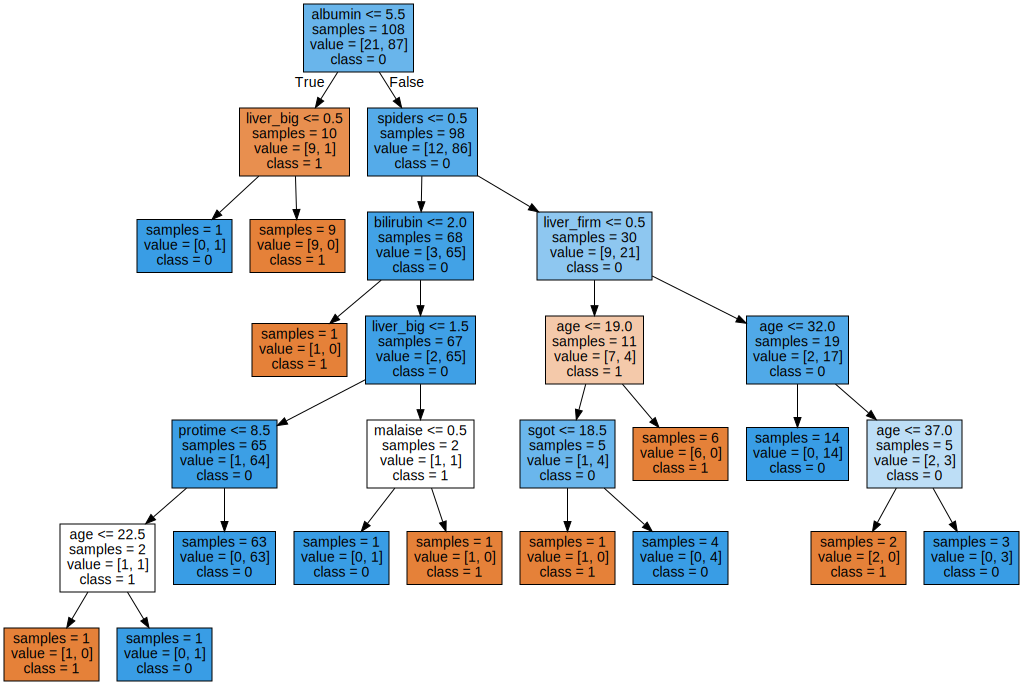

In [24]:
import graphviz
from sklearn.tree import export_graphviz
with open('hepatitis.dot') as fig: dot_graph = fig.read()
graphviz.Source(dot_graph)